# **Laboratorijska vježba 4**: Zadaci za samostalni rad

## **Podaci o pacijentima s kardiovaskularnim bolestima**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži informacije o pacijentima s kardiovaskularnim bolestima. Skup podataka sadrži sljedeće značajke:

* DEATH_EVENT - je li pacijent preminuo tijekom razdoblja praćenja
* sex - muško(1) ili žensko (0)
* anaemia - smanjenje crvenih krvnih stanica
* smoking
* diabetes - boluje li pacijent od dijabetesa
* high_blood_pressure - boluje li pacijent od hipertenzije
* age - dob pacijenta
* creatinine_phosphokinase - razina CPK enzima u krvi
* ejection_fraction - postotak krvi koji napušta srce u svakoj kontrakciji
* platelets - razina trombocita u krvi 
* serum_creatinine - razina kreatinina u krvi
* serum_sodium - razina serumskog natrija u krvi
* time - trajanje razdoblja praćenja (broj dana u bolnici)


In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
data_folder = './Data/'
df = pd.read_csv(data_folder + 'heart_failure_clinical_records_dataset.csv')
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
107,45.0,1,1876,1,35,0,226000.00,0.90,138,1,0,88,0
241,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
224,58.0,0,582,1,25,0,504000.00,1.00,138,1,0,205,0
104,60.0,0,53,0,50,1,286000.00,2.30,143,0,0,87,0
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1
207,85.0,0,212,0,38,0,186000.00,0.90,136,1,0,187,0
66,42.0,1,250,1,15,0,213000.00,1.30,136,0,0,65,1
169,70.0,0,835,0,35,1,305000.00,0.80,133,0,0,145,0
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,0,23,1
208,60.0,1,2281,1,40,0,283000.00,1.00,141,0,0,187,0


In [9]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,high_blood_pressure_DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729,0.171001
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270,0.043589
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728,-0.007399
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943,0.014006
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603,-0.164120
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351,0.526444
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139,0.042932
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278,0.208933
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204,-0.097820
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316,-0.068745


## **Zadatak 1: Modeliranje vremena provedenog u bolnici**

Potrebno je provesti regresijsku analizu za modeliranje broja dana provedenih u bolnici, među populacijom pacijenata. Počnimo s uzorkom koji je predstavljen našim skupom podataka. Zanimaju nas dva prediktora: dijabetes i visoki krvni tlak. Koristite ova dva prediktora kako biste modelirali broj dana u bolnici pomoću modela linearne regresije. 


Za početak, neka primjer modela bude:

vrijeme ~ C (dijabetes) + C (visoki krvni tlak).

Pomoću *ols()* funkcije iz biblioteke statsmodels definirajte model i procijenite parametre. 

In [5]:
from re import A
model = smf.ols(formula = 'time ~ C(diabetes) + C(high_blood_pressure)', data = df)
result = model.fit()
print(result.summary())
#R^2 - koeficijent odlucnosti - pokazuje nam da je 4% varijance zavisne varijablje objasnjen vezom izmedu zavisne i nezavisne varijable sto znaci da se regresijska linija nije
#priblizila stvarnim podacima
#R^2 adjusted je 3.3% sto je takoder vrlo lose i nas model se nije priblizio stvarnim podatcima
#iz p-ova vidimo da je diabetes varijabla koja ne utjece na izlaznu varijablu a povisen krvni tlak utjece jer je p < 0.05



a = df.query('diabetes == 0 and high_blood_pressure == 0')['time'].mean()
b = df.query('diabetes == 1 and high_blood_pressure == 0')['time'].mean()
c = df.query('diabetes == 0 and high_blood_pressure == 1')['time'].mean()
d = df.query('diabetes == 1 and high_blood_pressure == 1')['time'].mean()
print(f'Prosjecno vrijeme provedeno u bolnici za pacijente koji nemaju dijabetes ni visoki krvni tlak: {a} dana.')
print(f'Prosjecno vrijeme provedeno u bolnici za pacijente koji imaju dijabetes ali nemaju visoki krvni tlak: {b} dana.')
print(f'Prosjecno vrijeme provedeno u bolnici za pacijente koji nemaju dijabetes ali imaju visoki krvni tlak: {c} dana.')
print(f'Prosjecno vrijeme provedeno u bolnici za pacijente koji imaju i dijabetes i visoki krvni tlak: {d} dana.')





                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.097
Date:                Wed, 12 Apr 2023   Prob (F-statistic):            0.00254
Time:                        07:01:24   Log-Likelihood:                -1718.9
No. Observations:                 299   AIC:                             3444.
Df Residuals:                     296   BIC:                             3455.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Ispišite vrijednosti koeficijenata u modelu, p-vrijednosti F i t statističkih testova i $R_{adjusted}^2$. Komentirajte dobivene vrijednosti.

Interpretirajte dobiveni model prema vrijednostima koeficijenata. Navedite prosječno vrijeme provedeno u bolnici za:

1. Pacijente koji nemaju dijabetes ni visoki krvni tlak.
2. Pacijente koji imaju dijabetes, ali nemaju visoki krvni tlak.
3. Pacijente koji nemaju dijabetes, ali imaju visoki krvni tlak.
4. Pacijente koji imaju i dijabetes i visoki krvni tlak.

## **Zadatak 2: Modeliranje vremena provedenog u bolnici (dodavanje interakcijskih članova)**

U prethodnom modelu, moguće je zamijetiti kako osobe s povišenim krvnim tlakom kraće borave u bolnici, iako bi se moglo očekivati suprotno. Jedan od razloga zašto se ozbiljna stanja (poput hipertenzije) mogu povezati s kraćim vremenom provedenim u bolnici jest treći faktor - smrt. Pacijenti koji imaju obziljno stanje mogli bi provesti manje vremena u bolnici jer brzo umiru. Pokušajte steći bolji uvid u dani problem, ubacivanjem smrti kao još jednog prediktora u prethodnom modelu.

In [6]:
model_2 = smf.ols(formula = 'time ~ C(diabetes) + C(high_blood_pressure) + C(DEATH_EVENT)', data = df)
result_2 = model_2.fit()
print(result_2.summary())

#Iz R^2 i R^2 adjusted mozemo vidjeti da je ovaj model bolji od prethodnog i da smrt utjece na izlaznu varijablu
#iz p-a zakljucujemo da je smrt statisticki znacajan prediktor jer je < 0.05

# a = df.query('diabetes == 0 and high_blood_pressure == 0')['time'].mean()
# b = df.query('diabetes == 1 and high_blood_pressure == 0')['time'].mean()
# c = df.query('diabetes == 0 and high_blood_pressure == 1')['time'].mean()
# d = df.query('diabetes == 1 and high_blood_pressure == 1')['time'].mean()
# print(f'Prosjecno vrijeme provedeno u bolnici za pacijente koji nemaju dijabetes ni visoki krvni tlak: {a} dana.')
# print(f'Prosjecno vrijeme provedeno u bolnici za pacijente koji imaju dijabetes ali nemaju visoki krvni tlak: {b} dana.')
# print(f'Prosjecno vrijeme provedeno u bolnici za pacijente koji nemaju dijabetes ali imaju visoki krvni tlak: {c} dana.')
# print(f'Prosjecno vrijeme provedeno u bolnici za pacijente koji imaju i dijabetes i visoki krvni tlak: {d} dana.')



                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     42.69
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           6.12e-23
Time:                        07:01:35   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3350.
Df Residuals:                     295   BIC:                             3365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Procijenite parametre pomoću funkcije *ols()* te interpretirajte dobivene koeficijente i $R_{adjusted}^2$. Opisuje li dobiveni model dani problem bolje od prethodnog modela? Je li smrt statistički značajan prediktor?

Razmislite jesu li smrt i visoki krvni tlak međusobno nezavisne varijable. Na temelju Vašeg zaključka, razmotrite potrebu za ubacivanjem njihovog interakcijskog člana u prethodni model. Procijenite parametre modela te interpretirajte dobivene koeficijente i $R_{adjusted}^2$. Opisuje li dobiveni model dani problem bolje od prethodnog modela?

In [10]:
model_3 = smf.ols(formula = 'time ~ C(diabetes) + C(high_blood_pressure)*C(DEATH_EVENT)', data = df)
result_3 = model_3.fit()
print(result_3.summary())

#Rekao bih da su smrt i visoki krvni tlak medusobno povezane varijable ali kada sam ubacio njihov interakcijski član R^2 adjusted se smanjio. Korelacija izmedu te dvije varijable
#je manja od 0.1 sto mozemo vidjeti iz poziva df.corr() funckije. Dakle ubacivanje njihovog interakcijskog clana u prethodni model nam nece pomoci i model ce biti i malo losiji.

a = df.query('DEATH_EVENT == 0 and high_blood_pressure == 1')['time'].mean()
b = df.query('DEATH_EVENT == 1 and high_blood_pressure == 1')['time'].mean()

print(f'prosjecno vrijeme provedeno u bolnici kod pacijenata s visokim krvnim tlakom koji ne umiru tijekom boravka: {a}')
print(f'prosjecno vrijeme provedeno u bolnici kod pacijenata s visokim krvnim tlakom koji umiru tijekom boravka: {b}')



                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     31.92
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           4.32e-22
Time:                        07:16:00   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3352.
Df Residuals:                     294   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Navedite prosječno vrijeme provedeno u bolnici za:

1. Pacijente koji imaju visoki krvni tlak, a ne umiru tijekom razbolja praćenja.
2. Pacijente koji imaju visoki krvi tlak, a umiru tijekom razdoblja praćenja.

## **Zadatak 3. Logaritamske transformacije**

Prisjetite se da logaritamska transformacija izlazne varijable čini model multiplikativnim. Definirajte linearni model za predviđanje vremena provedenog u bolnici, a kao nezavisne varijable upotrijebite visoki krvni tlak, dijabetes i ishod smrti.

In [13]:
#napravit logaritamsku transformaciju stupca vrijeme
#mozda standardizirat tipa visina je od 0 do 200 a smrt od 0 do 1
model_4 = smf.ols(formula = 'time ~ C(diabetes) + C(high_blood_pressure) + C(DEATH_EVENT)', data = df)
result_4 = model_4.fit()
print(result_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     42.69
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           6.12e-23
Time:                        07:39:11   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3350.
Df Residuals:                     295   BIC:                             3365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Zatim izvedite logaritamsku transformaciju izlazne varijable na način da kreirate dodatni stupac (*log_time*) u skupu podataka koji sadrži logaritme vrijednosti iz stupca *time*. Ponovno definirajte model regresije kao prethodni, no ovaj puta s novodefiniranim stupcem kao izlaznom varijablom. 

In [15]:
df['log_time'] = np.log(df['time'])
model_5 = smf.ols(formula = 'log_time ~ C(diabetes) + C(high_blood_pressure) + C(DEATH_EVENT)', data = df)
result_5 = model_5.fit()
print(result_5.summary())

#u prvom modelu aditivni ucinak za high_blood_pressure nam kaze da ce u prosjeku pacijenti s povisenim krvnim tlakom biti 25 dana manje u bolnici.

#e^koeficijent za high_blood_pressure
a = pow(math.e, -0.2259)
print(f'Broj dana provedenih u bolnici + {a} = ukupan broj dana provedenih u bolnici.')
#multiplikativni ucinak u drugom modelu nam kaze da ce pacijenti s povisenim krvnim tlakom provesti 20% manje vremena u bolnici(Vrijeme provedeno u bolnici * 0.79)


                            OLS Regression Results                            
Dep. Variable:               log_time   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     55.05
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.75e-28
Time:                        07:44:59   Log-Likelihood:                -325.52
No. Observations:                 299   AIC:                             659.0
Df Residuals:                     295   BIC:                             673.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Za varijablu visoki tlak izračunajte koliki je njezin aditivni učinak u prvom modelu te koliki je multiplikativni učinak u drugom modelu na temelju pripadnih koeficijenata. Drugim riječima, kako se mijenja vrijednost izlazne varijable u prvom, odnosno drugom modelu, ako pacijent ima visoki krvni tlak?

## **Zadatak 4: Logistička regresija: Modeliranje ishoda smrti**

Modelirajte (binarni) ishod smrti na temelju **svih** karakteristika pacijenata. Izuzmite jedino vrijeme provedeno u bolnici jer smo vidjeli kako je ono u velikoj korelaciji sa smrću.

Kao prvi korak, provedite standardizaciju prediktora pomoću z-vrijednosti. To će Vam olakšati tumačenje prediktora koji su vrlo različitih skala. 



In [20]:
for column in df:
  if column != 'DEATH_EVENT':
    df[column] = (df[column] - df[column].mean()) / df[column].std()


Umjesto linearne, koristite logističku regresiju za modeliranje binarnog ishoda smrti. Napomena: koristite *logit()* funkciju iz biblioteke statsmodels. 

In [24]:
model = smf.logit(formula='DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase	+ diabetes +	ejection_fraction +	high_blood_pressure +	platelets	+ serum_creatinine +	serum_sodium +	sex +	smoking + time', data=df)
res = model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.367147
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.4151
Time:                        08:06:04   Log-Likelihood:                -109.78
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.771e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.3299      0.200     -6.645      0.000      -1.722

Protumačite dobivene koeficijente i $R_{adjusted}^2$. Koji su prediktori statistički značajni za modeliranje smrtnog ishoda? 
Pomoću *errorbar()* funkcije iz biblioteke matplotlib, vizualizirajte učinak svakog prediktora. Vrijednosti koeficijenata i standardne greške možete izvući iz modela regresije (*model.params.values* i *model.bse.values*). 

<ErrorbarContainer object of 3 artists>

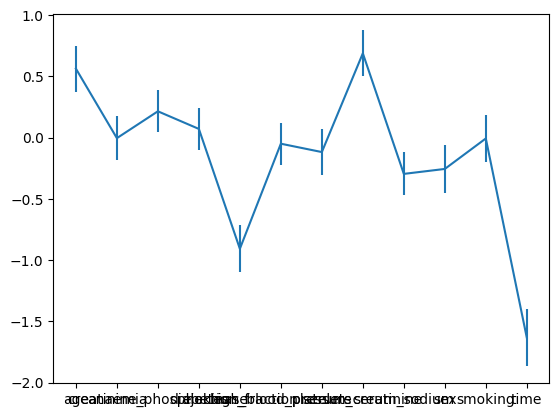

In [27]:
#Prediktori znacajni za modeliranje smrtnog ishoda:
#dob, ejection_fraction, serum_creatinine, time
#print(model.params.values)
plt.errorbar(res.params.index[1:],res.params.values[1:],res.bse.values[1:])

### **Zadatak 4.1. Logistička regresija: Upravljanje prediktorima**

Primijetite da nezavisne varijable (one koje se koriste kao prediktori u regresijskom modelu) često koreliraju. Primjerice, serumski kreatinin važan je pokazatelj zdravlja bubrega. Pomoću modela logističke regresije procijenite učinak serumskog kreatinina na zdravlje pacijenta. Drugim riječima, definirajte model logističke regresije koji kao izlaznu varijablu ima ishod smrti, a kao prediktor razinu kreatinina u krvi. 

In [28]:
model = smf.logit(formula='DEATH_EVENT ~ serum_creatinine', data=df)
res = model.fit()
print(res.summary())
#koeficijent za kreatin je 0.8526 sto znaci da je povecan rizik od smrti ukoliko je povisen kreatin

Optimization terminated successfully.
         Current function value: 0.580689
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                 0.07485
Time:                        08:13:46   Log-Likelihood:                -173.63
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.154e-07
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7429      0.131     -5.683      0.000      -0.999      -0.487
serum_creat

Primijetite da je serumski kreatinin u značajnoj korelaciji s godinama. Što je osoba starija, to je razina kreatinina u krvi veća. Imajući ovo na umu, ponovite logističku regresiju sada koristeći serumski kreatinin i dob kao prediktorske varijable. Što očekujete da će se dogoditi s koeficijentom serumskog kreatinina? Hoće li se smanjiti ili povećati? Što se dogodilo s $R^2$ koeficijentom modela?

In [30]:
model = smf.logit(formula='DEATH_EVENT ~ serum_creatinine + age', data=df)
res = model.fit()
print(res.summary())
#R koeficijent se povecao sa 7 na 10%
#koeficijent serumskog kreatinina se smanjio na 0.7384.

Optimization terminated successfully.
         Current function value: 0.558734
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.1098
Time:                        08:17:06   Log-Likelihood:                -167.06
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.117e-09
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7976      0.136     -5.880      0.000      -1.063      -0.532
serum_creat